<a href="https://colab.research.google.com/github/tranduy157/github.io/blob/main/CNTT17_01_Tr%E1%BA%A7n_%C4%90%E1%BB%A9c_Duy_BTK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mô tả dữ liệu:
        Số lượng bán     Doanh thu
count      5.000000  5.000000e+00
mean     112.000000  3.870000e+06
std       25.149553  2.218558e+06
min       85.000000  1.900000e+06
25%       95.000000  2.400000e+06
50%      110.000000  3.300000e+06
75%      120.000000  4.250000e+06
max      150.000000  7.500000e+06


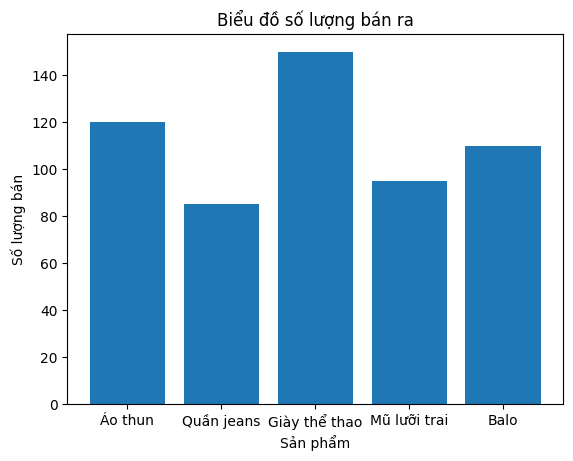

Mean Absolute Error: 3881274.13127413


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Thu thập dữ liệu (Tạo dữ liệu giả lập)
data = {
    "Mã sản phẩm": ["SP001", "SP002", "SP003", "SP004", "SP005"],
    "Tên sản phẩm": ["Áo thun", "Quần jeans", "Giày thể thao", "Mũ lưỡi trai", "Balo"],
    "Số lượng bán": [120, 85, 150, 95, 110],
    "Doanh thu": [2400000, 4250000, 7500000, 1900000, 3300000]
}
df = pd.DataFrame(data)
df.to_excel("/content/drive/MyDrive/CNTT17-01_Trần Đức Duy_BàiKtra2.xlsx", index=False)

# Bước 2: Làm sạch dữ liệu (Không có dữ liệu lỗi do tạo giả lập, nhưng có thể thêm các bước kiểm tra)
df.dropna(inplace=True)  # Xóa các giá trị thiếu
df = df[df["Số lượng bán"] > 0]  # Loại bỏ giá trị âm nếu có

# Bước 3: EDA (Phân tích dữ liệu khám phá)
print("Mô tả dữ liệu:\n", df.describe())
plt.bar(df["Tên sản phẩm"], df["Số lượng bán"])
plt.xlabel("Sản phẩm")
plt.ylabel("Số lượng bán")
plt.title("Biểu đồ số lượng bán ra")
plt.show()

# Bước 4: Xây dựng mô hình đơn giản (Dự đoán doanh thu dựa trên số lượng bán)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["Số lượng bán"]]
y = df["Doanh thu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Bước 5: Phân tích kết quả
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
